:')

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sp

Run = 10000 #number of sample
R = 10 # range ratio
CV = [3, 3 ,3 ,3 ,3]# CV%
fixed_bias = 0.05
propo_bias = 1
mean = [30, 150, 300, 1500, 3000]
cali_conc = [10, 50, 100, 500, 1000]
N = len(mean)
mean[0]

30

In [3]:
X = pd.DataFrame(index=range(Run),columns=range(N))
W = pd.DataFrame(index=range(Run),columns=range(N))
W

,0,1,2,3,4
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
9995,NaN,NaN,NaN,NaN,NaN
9996,NaN,NaN,NaN,NaN,NaN
9997,NaN,NaN,NaN,NaN,NaN
9998,NaN,NaN,NaN,NaN,NaN


In [4]:
for i in range(0,N):
    X[i] = cali_conc[i]
    W[i] = 1/(mean[i]**2)
W

,0,1,2,3,4
0,0.001111,0.000044,0.000011,4.444444e-07,1.111111e-07
1,0.001111,0.000044,0.000011,4.444444e-07,1.111111e-07
2,0.001111,0.000044,0.000011,4.444444e-07,1.111111e-07
3,0.001111,0.000044,0.000011,4.444444e-07,1.111111e-07
4,0.001111,0.000044,0.000011,4.444444e-07,1.111111e-07
...,...,...,...,...,...
9995,0.001111,0.000044,0.000011,4.444444e-07,1.111111e-07
9996,0.001111,0.000044,0.000011,4.444444e-07,1.111111e-07
9997,0.001111,0.000044,0.000011,4.444444e-07,1.111111e-07
9998,0.001111,0.000044,0.000011,4.444444e-07,1.111111e-07


In [10]:
Y = pd.DataFrame(index=range(Run),columns=range(N))
for i in range(0,N):
    Y[i] = np.random.normal(mean[i],mean[i]*(CV[i]/100),Run)
Y

,0,1,2,3,4
0,31.303964,151.775522,278.481747,1560.996740,2909.808967
1,30.645240,157.053620,288.776272,1527.564262,2998.627885
2,30.157587,152.374591,306.953263,1501.623791,2971.408824
3,29.294500,155.528906,294.391825,1536.751599,2974.480450
4,28.749389,151.771018,321.430530,1514.805508,2949.034921
...,...,...,...,...,...
9995,30.217156,149.962458,297.725521,1515.573688,2991.234861
9996,30.505705,154.880288,304.430716,1529.207816,3022.932097
9997,28.861943,146.676815,294.875895,1440.252590,3075.493057
9998,29.960822,145.341227,313.689268,1499.862525,3019.678224


In [13]:
X_bar = (X*W).sum(axis=1)/W.sum(axis=1) #Xmw

Y_bar = (Y*W).sum(axis=1)/W.sum(axis=1) #Ymw

SS_X = pd.DataFrame(index=range(Run),columns=range(N))
for i in range(0,N):
    SS_X[i] = W[i]*(X[i]-X_bar)**2
SS_X.head()

,0,1,2,3,4
0,0.007866,0.061966,0.084757,0.105555,0.108315
1,0.007866,0.061966,0.084757,0.105555,0.108315
2,0.007866,0.061966,0.084757,0.105555,0.108315
3,0.007866,0.061966,0.084757,0.105555,0.108315
4,0.007866,0.061966,0.084757,0.105555,0.108315


In [14]:
SSX_sum = SS_X.sum(axis=1) #Uw
SS_Y = pd.DataFrame(index=range(Run),columns=range(N))
for i in range(0,N):
    SS_Y[i] = W[i]*(Y[i]-Y_bar)**2
SSY_sum = SS_Y.sum(axis=1) #Qw
SS_XY = pd.DataFrame(index=range(Run),columns=range(N))
for i in range(0,N):
    SS_XY[i] = W[i]*(X[i]-X_bar)*(Y[i]-Y_bar)
SSXY_sum = SS_XY.sum(axis=1) #Pw
b = SSXY_sum/SSX_sum #b
b

0       2.949864
1       3.012826
2       3.020186
3       3.029798
4       3.067983
          ...   
9995    2.998643
9996    3.053590
9997    2.968023
9998    3.021164
9999    2.905623
Length: 10000, dtype: float64

In [15]:
a = Y_bar - b_hat*X_bar #a0
a

NameError: name 'b_hat' is not defined

In [9]:
QC = [60, 450, 1800] #Doctor's method
sample_mean_array = [20, 150, 600]
QC_CV = [3, 3, 3] 
QC_N = len(QC)
QC_df = pd.DataFrame(index=range(Run),columns=range(QC_N))
for i in range(0,QC_N):
    QC_df[i] = np.random.normal(QC[i],QC[i]*(QC_CV[i]/100),Run) #randomise 60/450/1800 not 20/150/600
QC_runs = [5, 10, 15, 20, 25, 30]
QC_df

,0,1,2
0,58.827124,445.329551,1781.591718
1,60.537414,427.512626,1717.598730
2,58.804242,456.371885,1771.050652
3,61.054633,461.259386,1815.252638
4,62.765153,457.641648,1763.855230
...,...,...,...
9995,60.370029,446.516223,1748.688196
9996,61.485318,449.897241,1869.355447
9997,57.367473,453.855162,1755.763706
9998,60.084578,451.119482,1878.191397


In [ ]:
QC = [20, 150, 600]                                #Prof Chun Yee's method
sample_mean_array = [20, 150, 600]
QC_CV = [3, 3, 3] 
QC_N = len(QC)
QC_df = pd.DataFrame(index=range(Run),columns=range(QC_N))

for i in range(0,QC_N):
    QC_df[i] = np.random.normal((QC[i]*b + a),QC[i]*(QC_CV[i]/100),Run) #randomise 60/450/1800 not 20/150/600
QC_runs = [5, 10, 15, 20, 25, 30]
QC_df

In [10]:
CV_percent = {}                      
mean_20_percent = {}
mean_150_percent = {}
mean_600_percent = {}
sd_20_percent = {}
sd_150_percent = {}
sd_600_percent = {}
cv_20_percent = {}
cv_150_percent = {}
cv_600_percent = {}
cv_percent = {}

for z in QC_runs:
    CV_percent[z] = pd.DataFrame(index=range(Run),columns=('a', 'b', '20', '150', '600'))
    i = -1
    for j in range(0,Run):
        if j % z == 0:
            i+=1
        CV_percent[z]['a'].iloc[j]=a[i]
        CV_percent[z]['b'].iloc[j]=b[i]
        CV_percent[z]['20'].iloc[j]= ((QC_df[0].iloc[j]) - a[i]) / b[i]
        CV_percent[z]['150'].iloc[j]= ((QC_df[1].iloc[j]) - a[i]) / b[i]
        CV_percent[z]['600'].iloc[j]= ((QC_df[2].iloc[j]) - a[i]) / b[i]

    mean_20_percent[z] = CV_percent[z]['20'].sum(axis=0)/Run #100 np.mean
    mean_150_percent[z] = CV_percent[z]['150'].sum(axis=0)/Run
    mean_600_percent[z] = CV_percent[z]['600'].sum(axis=0)/Run

    sd_20_percent[z] = np.std(CV_percent[z]['20'])
    sd_150_percent[z] = np.std(CV_percent[z]['150'])
    sd_600_percent[z] = np.std(CV_percent[z]['600'])

    cv_20_percent[z] = sd_20_percent[z]/mean_20_percent[z]
    cv_150_percent[z] = sd_150_percent[z]/mean_150_percent[z]
    cv_600_percent[z] = sd_600_percent[z]/mean_600_percent[z]   

In [ ]:
CV_percent[5]

In [ ]:
mean_20_percent[5]

In [ ]:
sd_20_percent[5]

In [ ]:
cv_600_percent

In [ ]:
histo_20 = plt.hist ((CV_percent[10]['20']), bins = 'auto', color = '#0504aa')

0.19000952109280553

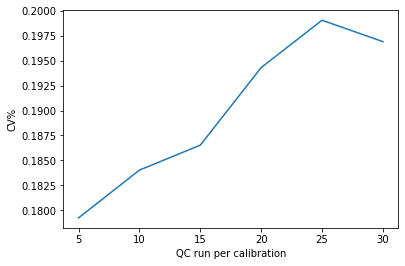

In [11]:
import matplotlib.pyplot as plt

CV_value = [cv_20_percent[5], cv_20_percent[10],cv_20_percent[15], cv_20_percent[20], cv_20_percent[25], cv_20_percent[30]]

plt.plot(QC_runs, CV_value)
plt.xlabel('QC run per calibration')
plt.ylabel('CV%')
mean_cv = np.mean(CV_value)
mean_cv

0.0344384629429371

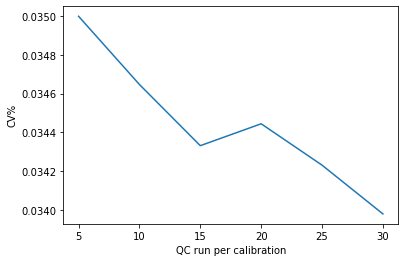

In [12]:
CV_value2 = [cv_150_percent[5], cv_150_percent[10],cv_150_percent[15], cv_150_percent[20], cv_150_percent[25], cv_150_percent[30]]

plt.plot(QC_runs, CV_value2)
plt.xlabel('QC run per calibration')
plt.ylabel('CV%')
mean_cv2 = np.mean(CV_value2)
mean_cv2

0.03858320932927752

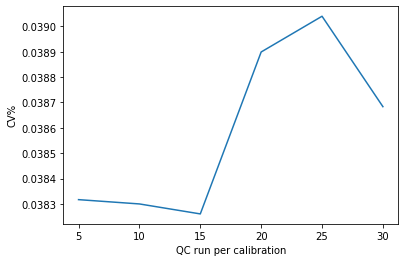

In [13]:
CV_value3 = [cv_600_percent[5], cv_600_percent[10],cv_600_percent[15], cv_600_percent[20], cv_600_percent[25], cv_600_percent[30]]

plt.plot(QC_runs, CV_value3)
plt.xlabel('QC run per calibration')
plt.ylabel('CV%')
mean_cv3 = np.mean(CV_value3)
mean_cv3

In [ ]:
mean_20_threesig

0.027552303918719448

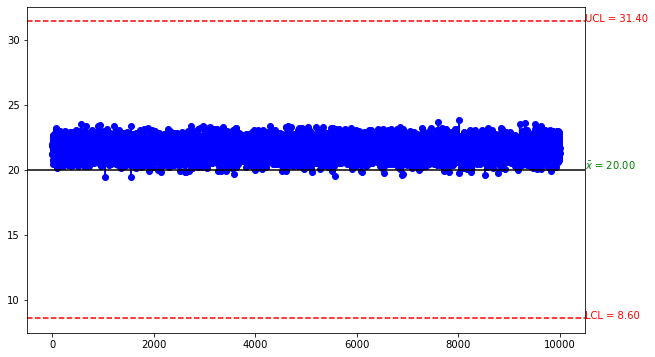

In [14]:
#do for 150 and 600 individually show CV of each 60,450,1800 #show representative figure PPT
testRun = 10000
# Create a sample dataset
sample_dataset = QC_df[0] #60*noise

# Create a list to store the sample groups means
sample_x_bar = sample_mean_array[0]

# Create a list to store the sample groups standard deviations
sample_stddev = sample_mean_array[0]*mean_cv #Find mean_cv of the 20 range of 5,10,15

UCL = sample_x_bar + 3 * sample_stddev
LCL = sample_x_bar - 3 * sample_stddev
reject_three_sigma = pd.DataFrame(index = range(testRun), columns = ['20'])
three_sigma = pd.DataFrame(index=range(testRun),columns=('a', 'b', '20'))
i = 0
for j in range(0,testRun):
    three_sigma['a'].iloc[j]=a[i]
    three_sigma['b'].iloc[j]=b[i]
    three_sigma['20'].iloc[j]= (QC_df[0].iloc[j]- a[i]) / b[i] 
    if ((three_sigma['20'].iloc[j]>UCL)|(three_sigma['20'].iloc[j]<LCL)):
        i+=1
        reject_three_sigma['20'].iloc[j] = three_sigma['20'].iloc[j]
        
mean_20_threesig = np.mean(three_sigma['20'])
sd_20_threesig = np.std(three_sigma['20'])
cv_20_threesig = sd_20_threesig / mean_20_threesig

         

    
fig, ax = plt.subplots(figsize = (10, 6))
plt.plot(three_sigma['20'], linestyle='-', marker='o', color='blue')
plt.plot(reject_three_sigma['20'], linestyle='', marker='o', color='red')
plt.axhline(y=sample_x_bar, color="black", linestyle="-")
plt.axhline(y=UCL, color="red", linestyle="--")
plt.axhline(y=LCL, color="red", linestyle="--")

# plt.xlim(150,200)
# # plt.ylim(30,90)
left, right = ax.get_xlim()
ax.text(right + 0.3, UCL, "UCL = " + str("{:.2f}".format(UCL)), color='red')
ax.text(right + 0.3, sample_x_bar, r'$\bar{x}$' + " = " + str("{:.2f}".format(sample_x_bar)), color='green')
ax.text(right + 0.3, LCL, "LCL = " + str("{:.2f}".format(LCL)), color='red')
cv_20_threesig

In [ ]:
 three_sigma

In [ ]:
three_sigma[170:201]

0.030333676020107777

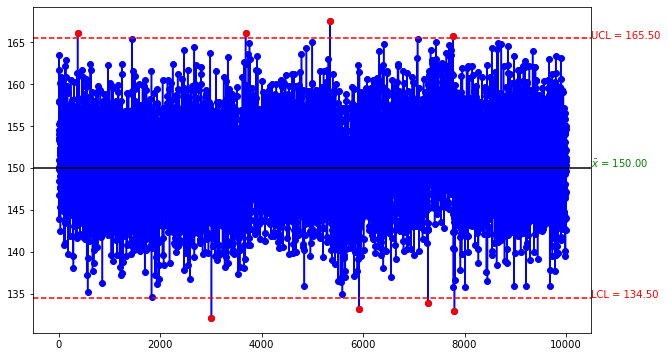

In [32]:
#do for 150 and 600 individually show CV of each 60,450,1800 
testRun = 10000
# Create a sample dataset
sample_dataset = QC_df[1]

# Create a list to store the sample groups means
sample_x_bar = sample_mean_array[1]

# Create a list to store the sample groups standard deviations
sample_stddev = sample_mean_array[1]*mean_cv2 #Find mean_cv of the 20 range of 5,10,15

UCL = sample_x_bar + 3 * sample_stddev
LCL = sample_x_bar - 3 * sample_stddev
reject_three_sigma = pd.DataFrame(index = range(testRun), columns = ['150'])
three_sigma = pd.DataFrame(index=range(testRun),columns=('a', 'b', '150'))
i = 0
for j in range(0,testRun):
    three_sigma['a'].iloc[j]=a[i]
    three_sigma['b'].iloc[j]=b[i]
    three_sigma['150'].iloc[j]= (QC_df[1].iloc[j]- a[i]) / b[i]
    if ((three_sigma['150'].iloc[j]>UCL)|(three_sigma['150'].iloc[j]<LCL)):
        i+=1
        reject_three_sigma['150'].iloc[j] = three_sigma['150'].iloc[j]
        
mean_150_threesig = np.mean(three_sigma['150'])
sd_150_threesig = np.std(three_sigma['150'])
cv_150_threesig = sd_150_threesig / mean_150_threesig

         

    
fig, ax = plt.subplots(figsize = (10, 6))
plt.plot(three_sigma['150'], linestyle='-', marker='o', color='blue')
plt.plot(reject_three_sigma['150'], linestyle='', marker='o', color='red')
plt.axhline(y=sample_x_bar, color="black", linestyle="-")
plt.axhline(y=UCL, color="red", linestyle="--")
plt.axhline(y=LCL, color="red", linestyle="--")

# plt.xlim(2500,2700)
# plt.ylim(350,500)
left, right = ax.get_xlim()
ax.text(right + 0.3, UCL, "UCL = " + str("{:.2f}".format(UCL)), color='red')
ax.text(right + 0.3, sample_x_bar, r'$\bar{x}$' + " = " + str("{:.2f}".format(sample_x_bar)), color='green')
ax.text(right + 0.3, LCL, "LCL = " + str("{:.2f}".format(LCL)), color='red')
cv_150_threesig

In [ ]:
three_sigma[2550:2600]

0.0318708886674729

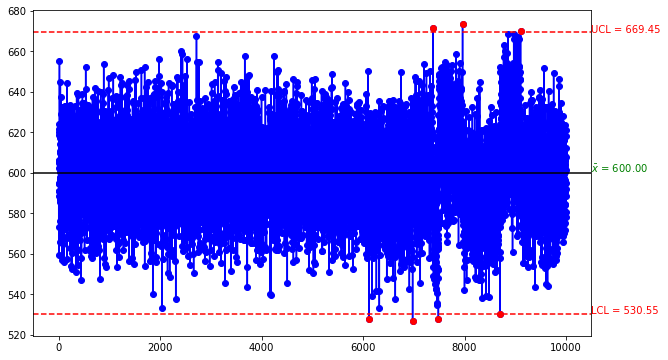

In [30]:
#do for 150 and 600 individually show CV of each 60,450,1800 
testRun = 10000
# Create a sample dataset
sample_dataset = QC_df[2]

# Create a list to store the sample groups means
sample_x_bar = sample_mean_array[2]

# Create a list to store the sample groups standard deviations
sample_stddev = sample_mean_array[2]*mean_cv3 #Find mean_cv of the 20 range of 5,10,15

UCL = sample_x_bar + 3 * sample_stddev
LCL = sample_x_bar - 3 * sample_stddev
reject_three_sigma = pd.DataFrame(index = range(testRun), columns = ['600'])
three_sigma = pd.DataFrame(index=range(testRun),columns=('a', 'b', '600'))
i = 0
for j in range(0,testRun):
    three_sigma['a'].iloc[j]=a[i]
    three_sigma['b'].iloc[j]=b[i]
    three_sigma['600'].iloc[j]= (QC_df[2].iloc[j]- a[i]) / b[i] 
    if ((three_sigma['600'].iloc[j]>UCL)|(three_sigma['600'].iloc[j]<LCL)):
        i+=1
        reject_three_sigma['600'].iloc[j] = three_sigma['600'].iloc[j]
        
mean_600_threesig = np.mean(three_sigma['600'])
sd_600_threesig = np.std(three_sigma['600'])
cv_600_threesig = sd_600_threesig / mean_600_threesig


fig, ax = plt.subplots(figsize = (10, 6))
plt.plot(three_sigma['600'], linestyle='-', marker='o', color='blue')
plt.plot(reject_three_sigma['600'], linestyle='', marker='o', color='red')
plt.axhline(y=sample_x_bar, color="black", linestyle="-")
plt.axhline(y=UCL, color="red", linestyle="--")
plt.axhline(y=LCL, color="red", linestyle="--")


# plt.xlim(6100,6350)
# plt.ylim(1600,2100)
left, right = ax.get_xlim()
ax.text(right + 0.3, UCL, "UCL = " + str("{:.2f}".format(UCL)), color='red')
ax.text(right + 0.3, sample_x_bar, r'$\bar{x}$' + " = " + str("{:.2f}".format(sample_x_bar)), color='green')
ax.text(right + 0.3, LCL, "LCL = " + str("{:.2f}".format(LCL)), color='red')
cv_600_threesig

In [ ]:
three_sigma[6100:6150]

In [ ]:
QC_df.iloc[0] 

In [ ]:
testRun = 10000
CV_value_stdev = [mean_cv, mean_cv2, mean_cv3]


# Create a sample dataset
sample_dataset = QC_df

# Create a list to store the sample groups means
sample_x_bar_20 = sample_mean_array[0]
sample_x_bar_150 = sample_mean_array[1]
sample_x_bar_600 = sample_mean_array[2]

# Create a list to store the sample groups standard deviations
sample_stddev_20 = sample_mean_array[0]*CV_value_stdev[0] #Find mean_cv of the 20 range of 5,10,15
sample_stddev_150 = sample_mean_array[1]*CV_value_stdev[1] #Find mean_cv of the 20 range of 5,10,15
sample_stddev_600 = sample_mean_array[2]*CV_value_stdev[2] #Find mean_cv of the 20 range of 5,10,15

UCL_20 = sample_x_bar_20 + 3 * sample_stddev_20
UCL_150 = sample_x_bar_150 + 3 * sample_stddev_150
UCL_600 = sample_x_bar_600 + 3 * sample_stddev_600
    
LCL_20 = sample_x_bar_20 - 3 * sample_stddev_20
LCL_150 = sample_x_bar_150 - 3 * sample_stddev_150
LCL_600 = sample_x_bar_600 - 3 * sample_stddev_600

reject_three_sigma = pd.DataFrame(index = range(testRun), columns = ('20','150','600'))
three_sigma = pd.DataFrame(index=range(testRun),columns=('a', 'b', '20','150','600'))
i = 0
for j in range(0,testRun):
    three_sigma['a'].iloc[j]=a[i]
    three_sigma['b'].iloc[j]=b[i]
    three_sigma['20'].iloc[j]= (QC_df[0].iloc[j]- a[i]) / b[i] 
    three_sigma['150'].iloc[j]= (QC_df[1].iloc[j]- a[i]) / b[i] 
    three_sigma['600'].iloc[j]= (QC_df[2].iloc[j]- a[i]) / b[i] 
    
    if ((three_sigma['20'].iloc[j]>UCL_20)|(three_sigma['20'].iloc[j]<LCL_20)|(three_sigma['150'].iloc[j]>UCL_150)|(three_sigma['150'].iloc[j]<LCL_150)|(three_sigma['600'].iloc[j]>UCL_600)|(three_sigma['600'].iloc[j]<LCL_600)):
        i+=1
        reject_three_sigma['20'].iloc[j] = three_sigma['20'].iloc[j]
        reject_three_sigma['150'].iloc[j] = three_sigma['150'].iloc[j]
        reject_three_sigma['600'].iloc[j] = three_sigma['600'].iloc[j]

mean_20_threesig = np.mean(three_sigma['20'])
sd_20_threesig = np.std(three_sigma['20'])
cv_20_threesig = sd_20_threesig / mean_20_threesig

mean_150_threesig = np.mean(three_sigma['150'])
sd_150_threesig = np.std(three_sigma['150'])
cv_150_threesig = sd_150_threesig / mean_150_threesig

mean_600_threesig = np.mean(three_sigma['600'])
sd_600_threesig = np.std(three_sigma['600'])
cv_600_threesig = sd_600_threesig / mean_600_threesig


In [ ]:
three_sigma[150:200]

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (10, 6))
plt.plot(three_sigma['20'], linestyle='-', marker='o', color='blue')
plt.plot(reject_three_sigma['20'], linestyle='', marker='o', color='red')
plt.axhline(y=sample_x_bar_20, color="black", linestyle="-")
plt.axhline(y=UCL_20, color="red", linestyle="--")
plt.axhline(y=LCL_20, color="red", linestyle="--")

# plt.xlim(100,200)
# plt.ylim(30,90)
left, right = ax.get_xlim()
ax.text(right + 0.3, UCL_20, "UCL = " + str("{:.2f}".format(UCL_20)), color='red')
ax.text(right + 0.3, sample_x_bar_20, r'$\bar{x}$' + " = " + str("{:.2f}".format(sample_x_bar_20)), color='green')
ax.text(right + 0.3, LCL_20, "LCL = " + str("{:.2f}".format(LCL_20)), color='red')
cv_20_threesig

In [ ]:
fig, ax = plt.subplots(figsize = (10, 6))
plt.plot(three_sigma['150'], linestyle='-', marker='o', color='blue')
plt.plot(reject_three_sigma['150'], linestyle='', marker='o', color='red')
plt.axhline(y=sample_x_bar_150, color="black", linestyle="-")
plt.axhline(y=UCL_150, color="red", linestyle="--")
plt.axhline(y=LCL_150, color="red", linestyle="--")

# plt.xlim(100,200)
# plt.ylim(350,500)
left, right = ax.get_xlim()
ax.text(right + 0.3, UCL_150, "UCL = " + str("{:.2f}".format(UCL_150)), color='red')
ax.text(right + 0.3, sample_x_bar_150, r'$\bar{x}$' + " = " + str("{:.2f}".format(sample_x_bar_150)), color='green')
ax.text(right + 0.3, LCL_150, "LCL = " + str("{:.2f}".format(LCL_150)), color='red')
cv_150_threesig

In [ ]:
fig, ax = plt.subplots(figsize = (10, 6))
plt.plot(three_sigma['600'], linestyle='-', marker='o', color='blue')
plt.plot(reject_three_sigma['600'], linestyle='', marker='o', color='red')
plt.axhline(y=sample_x_bar_600, color="black", linestyle="-")
plt.axhline(y=UCL_600, color="red", linestyle="--")
plt.axhline(y=LCL_600, color="red", linestyle="--")

# plt.xlim(100,200)
# plt.ylim(1600,2100)
left, right = ax.get_xlim()
ax.text(right + 0.3, UCL_600, "UCL = " + str("{:.2f}".format(UCL_600)), color='red')
ax.text(right + 0.3, sample_x_bar_600, r'$\bar{x}$' + " = " + str("{:.2f}".format(sample_x_bar_600)), color='green')
ax.text(right + 0.3, LCL_600, "LCL = " + str("{:.2f}".format(LCL_600)), color='red')
cv_600_threesig

0.027552303918719448

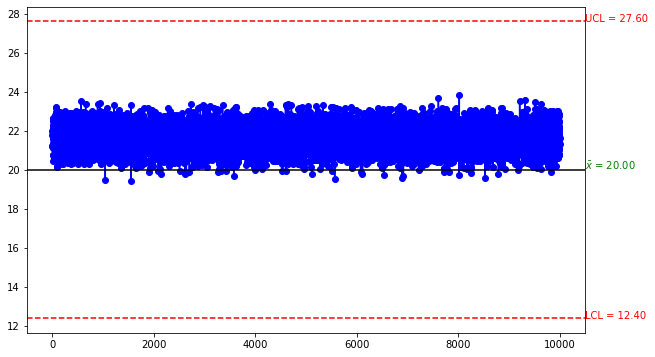

In [17]:
#do for 150 and 600 individually show CV of each 60,450,1800 
CV_value_stdev = [mean_cv, mean_cv2, mean_cv3]

testRun = 10000
# Create a sample dataset
sample_dataset = QC_df[0]

# Create a list to store the sample groups means
sample_x_bar = sample_mean_array[0]

# Create a list to store the sample groups standard deviations
sample_stddev = sample_mean_array[0] * CV_value_stdev[0] #Find mean_cv of the 20 range of 5,10,15

UCL = sample_x_bar + 2 * sample_stddev
LCL = sample_x_bar - 2 * sample_stddev
reject_two_sigma = pd.DataFrame(index = range(testRun), columns = ['20'])
two_sigma = pd.DataFrame(index=range(testRun),columns=('a', 'b', '20'))
i = 0
for j in range(0,testRun):
    two_sigma['a'].iloc[j]=a[i]
    two_sigma['b'].iloc[j]=b[i]
    two_sigma['20'].iloc[j]= (QC_df[0].iloc[j]- a[i]) / b[i] 
    if ((two_sigma['20'].iloc[j]>UCL)|(two_sigma['20'].iloc[j]<LCL)):
        i+=1
        reject_two_sigma['20'].iloc[j] = two_sigma['20'].iloc[j]
        
mean_20_twosig = np.mean(two_sigma['20'])
sd_20_twosig = np.std(two_sigma['20'])
cv_20_twosig = sd_20_twosig / mean_20_twosig

         

    
fig, ax = plt.subplots(figsize = (10, 6))
plt.plot(two_sigma['20'], linestyle='-', marker='o', color='blue')
plt.plot(reject_two_sigma['20'], linestyle='', marker='o', color='red')
plt.axhline(y=sample_x_bar, color="black", linestyle="-")
plt.axhline(y=UCL, color="red", linestyle="--")
plt.axhline(y=LCL, color="red", linestyle="--")

# plt.xlim(0,300)
# plt.ylim(30,90)
left, right = ax.get_xlim()
ax.text(right + 0.3, UCL, "UCL = " + str("{:.2f}".format(UCL)), color='red')
ax.text(right + 0.3, sample_x_bar, r'$\bar{x}$' + " = " + str("{:.2f}".format(sample_x_bar)), color='green')
ax.text(right + 0.3, LCL, "LCL = " + str("{:.2f}".format(LCL)), color='red')
cv_20_twosig

0.03201061340069186

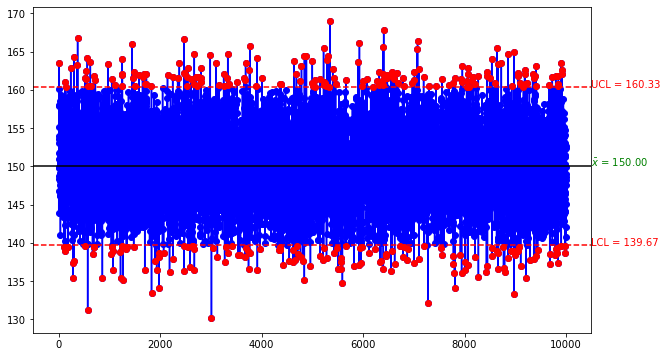

In [28]:
#do for 150 and 600 individually show CV of each 60,450,1800 
testRun = 10000

# Create a sample dataset
sample_dataset = QC_df[1]

# Create a list to store the sample groups means
sample_x_bar = sample_mean_array[1]

# Create a list to store the sample groups standard deviations
sample_stddev = sample_mean_array[1] * CV_value_stdev[1]

UCL = sample_x_bar + 2 * sample_stddev
LCL = sample_x_bar - 2 * sample_stddev
reject_two_sigma = pd.DataFrame(index = range(testRun), columns = ['150'])
two_sigma = pd.DataFrame(index=range(testRun),columns=('a', 'b', '150'))
i = 0
for j in range(0,testRun):
    two_sigma['a'].iloc[j]=a[i]
    two_sigma['b'].iloc[j]=b[i]
    two_sigma['150'].iloc[j]= (QC_df[1].iloc[j]- a[i]) / b[i] 
    if ((two_sigma['150'].iloc[j]>UCL)|(two_sigma['150'].iloc[j]<LCL)):
        i+=1
        reject_two_sigma['150'].iloc[j] = two_sigma['150'].iloc[j]
        
mean_150_twosig = np.mean(two_sigma['150'])
sd_150_twosig = np.std(two_sigma['150'])
cv_150_twosig = sd_150_twosig / mean_150_twosig

         

    
fig, ax = plt.subplots(figsize = (10, 6))
plt.plot(two_sigma['150'], linestyle='-', marker='o', color='blue')
plt.plot(reject_two_sigma['150'], linestyle='', marker='o', color='red')
plt.axhline(y=sample_x_bar, color="black", linestyle="-")
plt.axhline(y=UCL, color="red", linestyle="--")
plt.axhline(y=LCL, color="red", linestyle="--")

# plt.xlim(2500,2700)
# plt.ylim(350,500)
left, right = ax.get_xlim()
ax.text(right + 0.3, UCL, "UCL = " + str("{:.2f}".format(UCL)), color='red')
ax.text(right + 0.3, sample_x_bar, r'$\bar{x}$' + " = " + str("{:.2f}".format(sample_x_bar)), color='green')
ax.text(right + 0.3, LCL, "LCL = " + str("{:.2f}".format(LCL)), color='red')
cv_150_twosig

0.033069754269867094

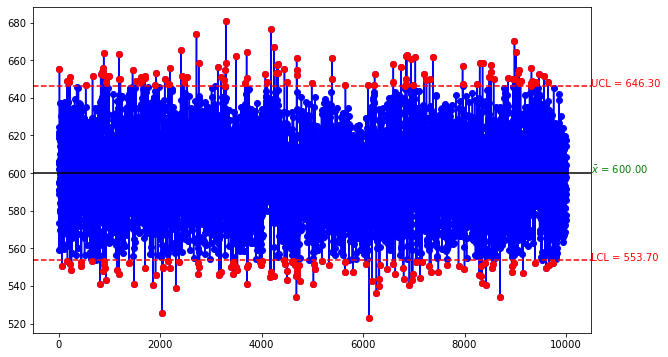

In [26]:
#do for 150 and 600 individually show CV of each 60,450,1800 
testRun = 10000
# Set standard deviation for control line
 
# Create a sample dataset
sample_dataset = QC_df[2]

# Create a list to store the sample groups means
sample_x_bar = sample_mean_array[2]

# Create a list to store the sample groups standard deviations
sample_stddev = sample_mean_array[2] * CV_value_stdev[2]#Find mean_cv of the 20 range of 5,10,15

UCL = sample_x_bar + 2 * sample_stddev
LCL = sample_x_bar - 2 * sample_stddev
reject_two_sigma = pd.DataFrame(index = range(testRun), columns = ['600'])
two_sigma = pd.DataFrame(index=range(testRun),columns=('a', 'b', '600'))
i = 0
for j in range(0,testRun):
    two_sigma['a'].iloc[j]=a[i]
    two_sigma['b'].iloc[j]=b[i]
    two_sigma['600'].iloc[j]= (QC_df[2].iloc[j]- a[i]) / b[i] 
    if ((two_sigma['600'].iloc[j]>UCL)|(two_sigma['600'].iloc[j]<LCL)):
        i+=1
        reject_two_sigma['600'].iloc[j] = two_sigma['600'].iloc[j]
        
mean_600_twosig = np.mean(two_sigma['600'])
sd_600_twosig = np.std(two_sigma['600'])
cv_600_twosig = sd_600_twosig / mean_600_twosig


fig, ax = plt.subplots(figsize = (10, 6))
plt.plot(two_sigma['600'], linestyle='-', marker='o', color='blue')
plt.plot(reject_two_sigma['600'], linestyle='', marker='o', color='red')
plt.axhline(y=sample_x_bar, color="black", linestyle="-")
plt.axhline(y=UCL, color="red", linestyle="--")
plt.axhline(y=LCL, color="red", linestyle="--")


# plt.xlim(6100,6350)
# plt.ylim(1600,2100)
left, right = ax.get_xlim()
ax.text(right + 0.3, UCL, "UCL = " + str("{:.2f}".format(UCL)), color='red')
ax.text(right + 0.3, sample_x_bar, r'$\bar{x}$' + " = " + str("{:.2f}".format(sample_x_bar)), color='green')
ax.text(right + 0.3, LCL, "LCL = " + str("{:.2f}".format(LCL)), color='red')
cv_600_twosig

In [ ]:
testRun = 10000
CV_value_stdev = [mean_cv, mean_cv2, mean_cv3]


# Create a sample dataset
sample_dataset = QC_df

# Create a list to store the sample groups means
sample_x_bar_20 = 20
sample_x_bar_150 = 150
sample_x_bar_600 = 600

# Create a list to store the sample groups standard deviations
sample_stddev_20 = sample_x_bar_20 * CV_value_stdev[0] #Find mean_cv of the 20 range of 5,10,15
sample_stddev_150 = sample_x_bar_150 * CV_value_stdev[1] #Find mean_cv of the 20 range of 5,10,15
sample_stddev_600 = sample_x_bar_600 * CV_value_stdev[2] #Find mean_cv of the 20 range of 5,10,15

UCL_20 = sample_x_bar_20 + 2 * sample_stddev_20
UCL_150 = sample_x_bar_150 + 2 * sample_stddev_150
UCL_600 = sample_x_bar_600 + 2 * sample_stddev_600
    
LCL_20 = sample_x_bar_20 - 2 * sample_stddev_20
LCL_150 = sample_x_bar_150 - 2 * sample_stddev_150
LCL_600 = sample_x_bar_600 - 2 * sample_stddev_600

reject_two_sigma = pd.DataFrame(index = range(testRun), columns = ('20','150','600'))
two_sigma = pd.DataFrame(index=range(testRun),columns=('a', 'b', '20','150','600'))
i = 0
for j in range(0,testRun):
    two_sigma['a'].iloc[j]=a[i]
    two_sigma['b'].iloc[j]=b[i]
    two_sigma['20'].iloc[j]= (QC_df[0].iloc[j]- a[i]) / b[i] 
    two_sigma['150'].iloc[j]= (QC_df[1].iloc[j]- a[i]) / b[i] 
    two_sigma['600'].iloc[j]= (QC_df[2].iloc[j]- a[i]) / b[i] 
    
    if ((two_sigma['20'].iloc[j]>UCL_20)|(two_sigma['20'].iloc[j]<LCL_20)|(two_sigma['150'].iloc[j]>UCL_150)|(two_sigma['150'].iloc[j]<LCL_150)|(two_sigma['600'].iloc[j]>UCL_600)|(two_sigma['600'].iloc[j]<LCL_600)):
        i+=1
        reject_two_sigma['20'].iloc[j] = two_sigma['20'].iloc[j]
        reject_two_sigma['150'].iloc[j] = two_sigma['150'].iloc[j]
        reject_two_sigma['600'].iloc[j] = two_sigma['600'].iloc[j]

mean_20_twosig = np.mean(two_sigma['20'])
sd_20_twosig = np.std(two_sigma['20'])
cv_20_twosig = sd_20_twosig / mean_20_twosig

mean_150_twosig = np.mean(two_sigma['150'])
sd_150_twosig = np.std(two_sigma['150'])
cv_150_twosig = sd_150_twosig / mean_150_twosig

mean_600_twosig = np.mean(two_sigma['600'])
sd_600_twosig = np.std(two_sigma['600'])
cv_600_twosig = sd_600_twosig / mean_600_twosig


In [ ]:
fig, ax = plt.subplots(figsize = (10, 6))
plt.plot(two_sigma['20'], linestyle='-', marker='o', color='blue')
plt.plot(reject_two_sigma['20'], linestyle='', marker='o', color='red')
plt.axhline(y=sample_x_bar_20, color="black", linestyle="-")
plt.axhline(y=UCL_20, color="red", linestyle="--")
plt.axhline(y=LCL_20, color="red", linestyle="--")

plt.xlim(100,200)
plt.ylim(30,90)
left, right = ax.get_xlim()
ax.text(right + 0.3, UCL_20, "UCL = " + str("{:.2f}".format(UCL_20)), color='red')
ax.text(right + 0.3, sample_x_bar_20, r'$\bar{x}$' + " = " + str("{:.2f}".format(sample_x_bar_20)), color='green')
ax.text(right + 0.3, LCL_20, "LCL = " + str("{:.2f}".format(LCL_20)), color='red')
cv_20_twosig

In [ ]:
fig, ax = plt.subplots(figsize = (10, 6))
plt.plot(two_sigma['150'], linestyle='-', marker='o', color='blue')
plt.plot(reject_two_sigma['150'], linestyle='', marker='o', color='red')
plt.axhline(y=sample_x_bar_150, color="black", linestyle="-")
plt.axhline(y=UCL_150, color="red", linestyle="--")
plt.axhline(y=LCL_150, color="red", linestyle="--")

plt.xlim(100,200)
plt.ylim(350,500)
left, right = ax.get_xlim()
ax.text(right + 0.3, UCL_150, "UCL = " + str("{:.2f}".format(UCL_150)), color='red')
ax.text(right + 0.3, sample_x_bar_150, r'$\bar{x}$' + " = " + str("{:.2f}".format(sample_x_bar_150)), color='green')
ax.text(right + 0.3, LCL_150, "LCL = " + str("{:.2f}".format(LCL_150)), color='red')
cv_150_twosig

In [ ]:
fig, ax = plt.subplots(figsize = (10, 6))
plt.plot(two_sigma['600'], linestyle='-', marker='o', color='blue')
plt.plot(reject_two_sigma['600'], linestyle='', marker='o', color='red')
plt.axhline(y=sample_x_bar_600, color="black", linestyle="-")
plt.axhline(y=UCL_600, color="red", linestyle="--")
plt.axhline(y=LCL_600, color="red", linestyle="--")

plt.xlim(100,200)
plt.ylim(1600,2100)
left, right = ax.get_xlim()
ax.text(right + 0.3, UCL_600, "UCL = " + str("{:.2f}".format(UCL_600)), color='red')
ax.text(right + 0.3, sample_x_bar_600, r'$\bar{x}$' + " = " + str("{:.2f}".format(sample_x_bar_600)), color='green')
ax.text(right + 0.3, LCL_600, "LCL = " + str("{:.2f}".format(LCL_600)), color='red')
cv_600_twosig

0.027552303918719448

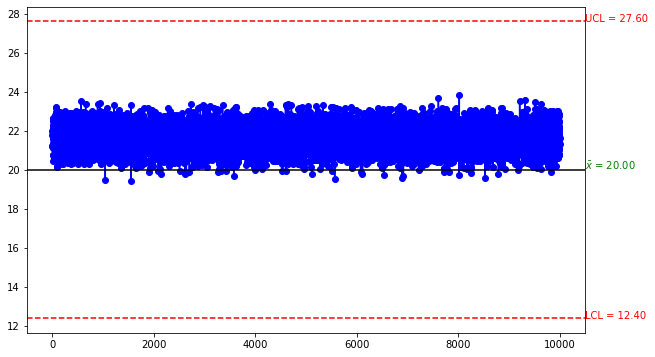

In [20]:
import matplotlib.pyplot as plt #Change to 2:2s and R:4s change truth logic

#do for 20 and 600 individually show CV of each 60,450,1800 
testRun = 10000
CV_value_stdev = [mean_cv, mean_cv2, mean_cv3]
# Create a sample dataset
sample_dataset = QC_df[0]

# Create a list to store the sample groups means
sample_x_bar = sample_mean_array[0]

# Create a list to store the sample groups standard deviations
sample_stddev =  sample_x_bar * CV_value_stdev[0] #Find mean_cv of the 20 range of 5,10,15

UCL = sample_x_bar + 2 * sample_stddev
LCL = sample_x_bar - 2 * sample_stddev
reject_two_two_sigma = pd.DataFrame(index = range(testRun), columns = ['20'])
two_two_sigma = pd.DataFrame(index=range(testRun),columns=('a', 'b', '20'))
i = 0
for j in range(0,testRun):
    two_two_sigma['a'].iloc[j]=a[i]
    two_two_sigma['b'].iloc[j]=b[i]
    two_two_sigma['20'].iloc[j]= (QC_df[0].iloc[j]- a[i]) / b[i] 
    if j >1:
        if ((abs(two_two_sigma['20'].iloc[j-1]-sample_x_bar))>(UCL-sample_x_bar) and (abs(two_two_sigma['20'].iloc[j]-sample_x_bar))>(UCL-sample_x_bar)):
            i+=1
            reject_two_two_sigma['20'].iloc[j] = two_two_sigma['20'].iloc[j]
        
mean_20_two_twosig = np.mean(two_two_sigma['20'])
sd_20_two_twosig = np.std(two_two_sigma['20'])
cv_20_two_twosig = sd_20_two_twosig / mean_20_two_twosig

         

    
fig, ax = plt.subplots(figsize = (10, 6))
plt.plot(two_two_sigma['20'], linestyle='-', marker='o', color='blue')
plt.plot(reject_two_two_sigma['20'], linestyle='', marker='o', color='red')
plt.axhline(y=sample_x_bar, color="black", linestyle="-")
plt.axhline(y=UCL, color="red", linestyle="--")
plt.axhline(y=LCL, color="red", linestyle="--")

# plt.xlim(100,125)
# plt.ylim(135,170)
left, right = ax.get_xlim()
ax.text(right + 0.3, UCL, "UCL = " + str("{:.2f}".format(UCL)), color='red')
ax.text(right + 0.3, sample_x_bar, r'$\bar{x}$' + " = " + str("{:.2f}".format(sample_x_bar)), color='green')
ax.text(right + 0.3, LCL, "LCL = " + str("{:.2f}".format(LCL)), color='red')
cv_20_two_twosig

0.03204013747088828

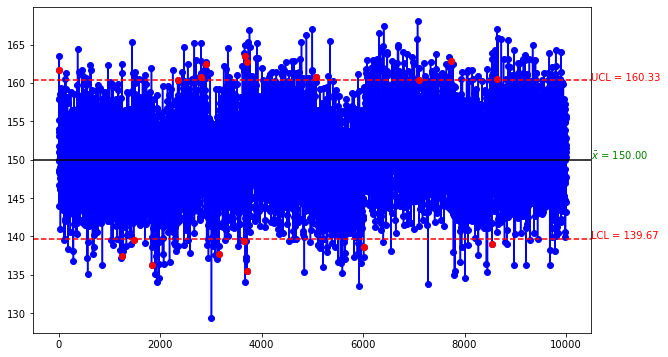

In [24]:
import matplotlib.pyplot as plt

#do for 150 and 600 individually show CV of each 60,450,1800 
testRun = 10000
CV_value_stdev = [mean_cv, mean_cv2, mean_cv3]
# Create a sample dataset
sample_dataset = QC_df[1]

# Create a list to store the sample groups means
sample_x_bar = sample_mean_array[1]

# Create a list to store the sample groups standard deviations
sample_stddev =  sample_x_bar * CV_value_stdev[1] #Find mean_cv of the 150 range of 5,10,15

UCL = sample_x_bar + 2 * sample_stddev
LCL = sample_x_bar - 2 * sample_stddev
reject_two_two_sigma = pd.DataFrame(index = range(testRun), columns = ['150'])
two_two_sigma = pd.DataFrame(index=range(testRun),columns=('a', 'b', '150'))
i = 0
for j in range(0,testRun):
    two_two_sigma['a'].iloc[j]=a[i]
    two_two_sigma['b'].iloc[j]=b[i]
    two_two_sigma['150'].iloc[j]= (QC_df[1].iloc[j]- a[i]) / b[i] 
    if j >1:
        if ((abs(two_two_sigma['150'].iloc[j-1]-sample_x_bar))>(UCL-sample_x_bar) and (abs(two_two_sigma['150'].iloc[j]-sample_x_bar))>(UCL-sample_x_bar)):
            i+=1
            reject_two_two_sigma['150'].iloc[j] = two_two_sigma['150'].iloc[j]
        
mean_150_two_twosig = np.mean(two_two_sigma['150'])
sd_150_two_twosig = np.std(two_two_sigma['150'])
cv_150_two_twosig = sd_150_two_twosig / mean_150_two_twosig

         

    
fig, ax = plt.subplots(figsize = (10, 6))
plt.plot(two_two_sigma['150'], linestyle='-', marker='o', color='blue')
plt.plot(reject_two_two_sigma['150'], linestyle='', marker='o', color='red')
plt.axhline(y=sample_x_bar, color="black", linestyle="-")
plt.axhline(y=UCL, color="red", linestyle="--")
plt.axhline(y=LCL, color="red", linestyle="--")

# plt.xlim(5390,5500)
# plt.ylim(135,170)
left, right = ax.get_xlim()
ax.text(right + 0.3, UCL, "UCL = " + str("{:.2f}".format(UCL)), color='red')
ax.text(right + 0.3, sample_x_bar, r'$\bar{x}$' + " = " + str("{:.2f}".format(sample_x_bar)), color='green')
ax.text(right + 0.3, LCL, "LCL = " + str("{:.2f}".format(LCL)), color='red')
cv_150_two_twosig

0.02979223767948564

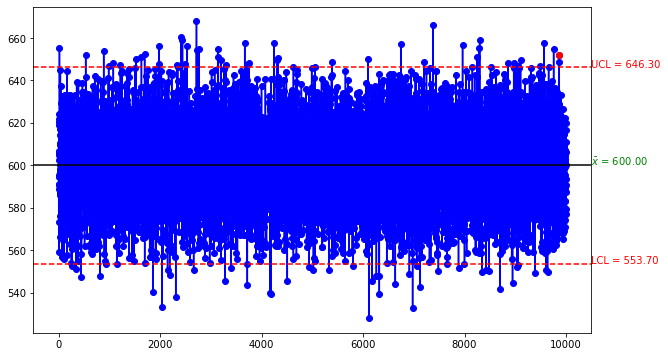

In [34]:
import matplotlib.pyplot as plt

#do for 600 and 600 individually show CV of each 60,450,1800 
testRun = 10000
CV_value_stdev = [mean_cv, mean_cv2, mean_cv3]
# Create a sample dataset
sample_dataset = QC_df[2]

# Create a list to store the sample groups means
sample_x_bar = sample_mean_array[2]

# Create a list to store the sample groups standard deviations
sample_stddev =  sample_x_bar * CV_value_stdev[2] #Find mean_cv of the 600 range of 5,10,15

UCL = sample_x_bar + 2 * sample_stddev
LCL = sample_x_bar - 2 * sample_stddev
reject_two_two_sigma = pd.DataFrame(index = range(testRun), columns = ['600'])
two_two_sigma = pd.DataFrame(index=range(testRun),columns=('a', 'b', '600'))
i = 0
for j in range(0,testRun):
    two_two_sigma['a'].iloc[j]=a[i]
    two_two_sigma['b'].iloc[j]=b[i]
    two_two_sigma['600'].iloc[j]= (QC_df[2].iloc[j]- a[i]) / b[i] 
    if j >1:
        if ((abs(two_two_sigma['600'].iloc[j-1]-sample_x_bar))>(UCL-sample_x_bar) and (abs(two_two_sigma['600'].iloc[j]-sample_x_bar))>(UCL-sample_x_bar)):
            i+=1
            reject_two_two_sigma['600'].iloc[j] = two_two_sigma['600'].iloc[j]
        
mean_600_two_twosig = np.mean(two_two_sigma['600'])
sd_600_two_twosig = np.std(two_two_sigma['600'])
cv_600_two_twosig = sd_600_two_twosig / mean_600_two_twosig

         

    
fig, ax = plt.subplots(figsize = (10, 6))
plt.plot(two_two_sigma['600'], linestyle='-', marker='o', color='blue')
plt.plot(reject_two_two_sigma['600'], linestyle='', marker='o', color='red')
plt.axhline(y=sample_x_bar, color="black", linestyle="-")
plt.axhline(y=UCL, color="red", linestyle="--")
plt.axhline(y=LCL, color="red", linestyle="--")

# plt.xlim(100,125)
# plt.ylim(135,170)
left, right = ax.get_xlim()
ax.text(right + 0.3, UCL, "UCL = " + str("{:.2f}".format(UCL)), color='red')
ax.text(right + 0.3, sample_x_bar, r'$\bar{x}$' + " = " + str("{:.2f}".format(sample_x_bar)), color='green')
ax.text(right + 0.3, LCL, "LCL = " + str("{:.2f}".format(LCL)), color='red')
cv_600_two_twosig

In [ ]:
import matplotlib.pyplot as plt

#do for 20 and 600 individually show CV of each 60,450,1800 
testRun = 10000
CV_value_stdev = [mean_cv, mean_cv2, mean_cv3]
# Create a sample dataset
sample_dataset = QC_df[0]

# Create a list to store the sample groups means
sample_x_bar = sample_mean_array[0]

# Create a list to store the sample groups standard deviations
sample_stddev =  sample_x_bar * CV_value_stdev[0] #Find mean_cv of the 20 range of 5,10,15

UCL = sample_x_bar + 2 * sample_stddev
LCL = sample_x_bar - 2 * sample_stddev
reject_two_two_sigma = pd.DataFrame(index = range(testRun), columns = ['20'])
two_two_sigma = pd.DataFrame(index=range(testRun),columns=('a', 'b', '20'))
i = 0
for j in range(0,testRun):
    two_two_sigma['a'].iloc[j]=a[i]
    two_two_sigma['b'].iloc[j]=b[i]
    two_two_sigma['20'].iloc[j]= (QC_df[0].iloc[j]- a[i]) / b[i] 
    if j >1:
        if (two_two_sigma['20'].iloc[j-1]>UCL and two_two_sigma['20'].iloc[j]>UCL):
            i+=1
            reject_two_two_sigma['20'].iloc[j] = two_two_sigma['20'].iloc[j]
        if (two_two_sigma['20'].iloc[j-1]<LCL and two_two_sigma['20'].iloc[j]<LCL):
            i+=1
            reject_two_two_sigma['20'].iloc[j] = two_two_sigma['20'].iloc[j]
        
mean_20_two_twosig = np.mean(two_two_sigma['20'])
sd_20_two_twosig = np.std(two_two_sigma['20'])
cv_20_two_twosig = sd_20_two_twosig / mean_20_two_twosig

         

    
fig, ax = plt.subplots(figsize = (10, 6))
plt.plot(two_two_sigma['20'], linestyle='-', marker='o', color='blue')
plt.plot(reject_two_two_sigma['20'], linestyle='', marker='o', color='red')
plt.axhline(y=sample_x_bar, color="black", linestyle="-")
plt.axhline(y=UCL, color="red", linestyle="--")
plt.axhline(y=LCL, color="red", linestyle="--")

# plt.xlim(100,125)
# plt.ylim(135,170)
left, right = ax.get_xlim()
ax.text(right + 0.3, UCL, "UCL = " + str("{:.2f}".format(UCL)), color='red')
ax.text(right + 0.3, sample_x_bar, r'$\bar{x}$' + " = " + str("{:.2f}".format(sample_x_bar)), color='green')
ax.text(right + 0.3, LCL, "LCL = " + str("{:.2f}".format(LCL)), color='red')
cv_20_two_twosig

In [ ]:
std_b = np.std(b)
sigma_b = abs(b - np.mean(b))
sigma_b


In [ ]:
Y_est = pd.DataFrame(index=range(Run),columns=range(N))
for i in range(0,N):
    Y_est[i] = a + b * X[i] #y-estimate
Y_est.head()


In [ ]:
SS_YY = pd.DataFrame(index=range(Run),columns=range(N))
for i in range(0,N):
    SS_YY[i] = (Y[i]-Y_est[i])**2
SSYY_sum = SS_YY.sum(axis=1)
SD_YX = (SSYY_sum/(N-2))**0.5 #SDYX value
SD_YX[:10] 

In [ ]:
SE_b = SD_YX/(SSX_sum**0.5)
SE_b[:10]

In [ ]:
SE_a =  SD_YX*(1/N + (sumX**2)/SSX_sum)**0.5
SE_a[:10]

In [ ]:
from scipy.stats import t
df = N-2
alpha = 0.1
t_crit = t.ppf(1.0 - alpha/2, df)
t_crit

In [ ]:
Results['Reject slope b'] = 1*(abs(Results['b']-1)/SE_b>t_crit)
Results['Reject intercept a'] = 1*(abs(Results['a'])/SE_a>t_crit)
Results['Reject b or a'] = 1*((abs(Results['a'])/SE_a>t_crit)|(abs(Results['b']-1)/SE_b>t_crit))
Rej_b = Results['Reject slope b'].sum()/Run
Rej_b_dp = "{:.2f}".format(Rej_b)
Rej_a = Results['Reject intercept a'].sum()/Run
Rej_ab = Results['Reject b or a'].sum()/Run
Rej_ab_dp = "{:.2f}".format(Rej_ab)
Rej_a_dp = "{:.2f}".format(Rej_a) # Rejection rate based on intercept
Rej_a_dp

In [ ]:
Rej_b_dp #Rejection rated based on Slope

In [ ]:
Rej_ab_dp # Rejection rate based on slope or intercept

In [ ]:
Results[:10]

In [33]:
i

8